### **Loading Libraries**

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import datetime
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import numpy as np

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [2]:
credit=pd.read_csv("credit_risk.csv")
credit.head()

,id,'checking_status','duration','credit_history','purpose','credit_amount','savings_status','employment','installment_commitment','personal_status',...,'property_magnitude','age','other_payment_plans','housing','existing_credits','job','num_dependents','own_telephone','foreign_worker','class'
0,1,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,2,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,3,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,4,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,5,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


# **Data Preprocessing**

In [ ]:
credit.shape
credit.info()
credit.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1000 non-null   int64 
 1   'checking_status'         1000 non-null   object
 2   'duration'                1000 non-null   int64 
 3   'credit_history'          1000 non-null   object
 4   'purpose'                 1000 non-null   object
 5   'credit_amount'           1000 non-null   int64 
 6   'savings_status'          1000 non-null   object
 7   'employment'              1000 non-null   object
 8   'installment_commitment'  1000 non-null   int64 
 9   'personal_status'         1000 non-null   object
 10  'other_parties'           1000 non-null   object
 11  'residence_since'         1000 non-null   int64 
 12  'property_magnitude'      1000 non-null   object
 13  'age'                     1000 non-null   int64 
 14  'other_payment_plans'    

,id,'duration','credit_amount','installment_commitment','residence_since','age','existing_credits','num_dependents'
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,288.819436,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,1.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,250.750000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,500.500000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,750.250000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,1000.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [ ]:
credit.isna().any()
credit.isna().sum()

,0
id,0
'checking_status',0
'duration',0
'credit_history',0
'purpose',0
'credit_amount',0
'savings_status',0
'employment',0
'installment_commitment',0
'personal_status',0


In [4]:
credit.rename(columns = {"'checking_status'":'Checking_Status', "'duration'":'Duration',"'credit_history'":'Credit_History',"'purpose'":'Purpose',
                         "'credit_amount'":'Credit_Amount',"'savings_status'":'Savings_Status',"'employment'":'Employment',"'installment_commitment'":'Installment_Commitment',
                         "'personal_status'":'Relationship_Status',"'other_parties'":'Other_Parties',"'residence_since'":'Time_Owned',"'property_magnitude'":'Property_Type',
                         "'age'":'Age',"'other_payment_plans'":'Other_Payment_Plans',"'housing'":'Living_Status',"'existing_credits'":'Existing_Credits',"'job'":'Job',
                         "'num_dependents'":'Dependents',"'own_telephone'":'Telephone',"'foreign_worker'":'Foreign_Worker',"'class'":'Credit_Risk'
                         }, inplace = True)

In [5]:
credit['Credit_Risk'].value_counts()

,count
Credit_Risk,
good,700
bad,300


In [6]:
credit.drop(['id','Telephone','Foreign_Worker','Relationship_Status'], axis=1,inplace=True)

In [7]:
credit['Property_Type']=credit['Property_Type'].map({
    'car':2,
    'no known property':3,
    'real estate': 1,
    'life insurance':1
})

In [8]:
credit['Purpose'] = credit['Purpose'].map({
    'radio/tv': 1,
    'new car': 1,
    'furniture/equipment': 1,
    'domestic appliance': 1,
    'repairs': 1,
    'retraining': 1,
    'business': 2,
    'education': 2,
    'used car': 2,
    'other':2
})

In [9]:
credit['Savings_Status'] = credit['Savings_Status'].map({
    '<100': 3,
    'no known savings': 3,
    '100<=X<500': 2,
    '500<=X<1000': 1,
    '>=1000': 1
})

In [10]:
credit['Employment'] = credit['Employment'].map({
    'unemployed': 4,
    '<1': 3,
    '1<=X<4': 2,
    '4<=X<7': 2,
    '>=7': 1
})

In [11]:
credit['Checking_Status'] = credit['Checking_Status'].map({
    'no checking':2,
    '<0': 2,
    '0<=X<200': 1,
    '>=200': 1
})

In [12]:
credit['Credit_History'] = credit['Credit_History'].map({
    'existing paid': 1,
    'critical/other existing credit	': 2,
    'delayed previously': 2,
    'no credits/all paid': 1,
    'all paid': 1
})

In [13]:
credit['Other_Parties'] = credit['Other_Parties'].map({
    'none': 2,
    'guarantor': 1,
    'co applicant': 1
})

In [14]:
credit['Other_Payment_Plans'] = credit['Other_Payment_Plans'].map({
    'none': 2,
    'bank': 1,
    'stores':1
})

In [15]:
credit['Living_Status'] = credit['Living_Status'].map({
    'own': 1,
    'rent': 2,
    'for free':3
})

In [16]:
credit['Job'] = credit['Job'].map({
    'skilled': 1,
    'unskilled resident': 2,
    'high qualif/self emp/mgmt	':1,
    'unemp/unskilled non res':2
})

In [17]:
credit['Credit_Risk'] = credit['Credit_Risk'].map({
    'good': 0,
    'bad': 1,
})

In [18]:
credit.drop_duplicates(inplace=True)
credit.fillna(credit.mean(),inplace=True)

In [19]:
def remove_outliers(df):
    for column in df.select_dtypes(include=['int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

remove_outliers(credit)

,Checking_Status,Duration,Credit_History,Purpose,Credit_Amount,Savings_Status,Employment,Installment_Commitment,Other_Parties,Time_Owned,Property_Type,Age,Other_Payment_Plans,Living_Status,Existing_Credits,Job,Dependents,Credit_Risk
9,1,30,1.12447,1,5234,3,4,4,2,2,2,28,2,1,2,1.260563,1,1
10,1,12,1.00000,1,1295,3,3,3,2,1,2,25,2,2,1,1.000000,1,1
12,1,12,1.00000,1,1567,3,2,1,2,1,2,22,2,1,1,1.000000,1,0
13,2,24,1.12447,1,1199,3,1,4,2,4,2,60,2,1,2,2.000000,1,1
14,2,15,1.00000,1,1403,3,2,2,2,4,2,28,2,2,1,1.000000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,2,18,1.00000,1,1936,3,2,2,2,4,2,23,2,2,2,2.000000,1,0
993,2,36,1.00000,1,3959,3,4,4,2,3,1,30,2,1,1,1.260563,1,0
994,2,12,1.00000,1,2390,3,1,4,2,3,2,50,2,1,1,1.000000,1,0
995,2,12,1.00000,1,1736,3,2,3,2,4,1,31,2,1,1,2.000000,1,0


In [20]:
scaler = StandardScaler()
credit[['Age', 'Credit_Amount','Installment_Commitment','Existing_Credits']] = scaler.fit_transform(credit[['Age','Credit_Amount','Installment_Commitment','Existing_Credits']])

# **Cluster Analysis and Model Training**

In [26]:
# Assuming df is the DataFrame with both numerical and manually ranked categorical features
columns_to_cluster = [col for col in credit.columns if col != 'Credit_Risk']
correlation_matrix = credit[columns_to_cluster].corr(method='spearman')

correlation_matrix

,Checking_Status,Duration,Credit_History,Purpose,Credit_Amount,Savings_Status,Employment,Installment_Commitment,Other_Parties,Time_Owned,Property_Type,Age,Other_Payment_Plans,Living_Status,Existing_Credits,Job,Dependents
Checking_Status,1.000000,-0.016832,0.046193,-0.024223,-0.017091,0.053850,-0.098463,0.071608,0.037463,0.085180,-0.035810,0.064761,0.034097,0.007916,0.079941,-0.073578,0.067241
Duration,-0.016832,1.000000,0.050709,0.243827,0.624709,0.016581,-0.037145,0.118046,0.010335,0.043671,0.280127,-0.036316,-0.084644,0.079519,0.028430,-0.120823,-0.043265
Credit_History,0.046193,0.050709,1.000000,0.089637,0.064472,0.002915,-0.122424,0.023193,0.078777,0.055331,-0.005069,0.177171,0.021342,-0.070456,0.567015,-0.006911,0.049656
Purpose,-0.024223,0.243827,0.089637,1.000000,0.280588,-0.010718,-0.045981,-0.076834,0.088999,0.073082,0.181370,0.082253,-0.095079,0.131811,0.062615,0.017321,0.059006
Credit_Amount,-0.017091,0.624709,0.064472,0.280588,1.000000,0.060169,0.015060,-0.313100,-0.005558,0.023646,0.280847,0.026298,-0.035339,0.131280,0.023778,-0.050223,0.041815
Savings_Status,0.053850,0.016581,0.002915,-0.010718,0.060169,1.000000,0.052332,0.010179,-0.082591,-0.028130,-0.020119,0.004175,0.001555,0.012810,0.028744,0.038668,0.008682
Employment,-0.098463,-0.037145,-0.122424,-0.045981,0.015060,0.052332,1.000000,-0.118573,-0.015045,-0.255290,-0.096648,-0.320110,0.020342,-0.018553,-0.122793,0.113360,-0.092096
Installment_Commitment,0.071608,0.118046,0.023193,-0.076834,-0.313100,0.010179,-0.118573,1.000000,0.014613,0.047507,0.049515,0.072157,-0.016789,-0.038215,0.020997,-0.056022,-0.072543
Other_Parties,0.037463,0.010335,0.078777,0.088999,-0.005558,-0.082591,-0.015045,0.014613,1.000000,0.022564,0.105369,0.026816,0.032758,0.008802,0.013396,-0.001001,-0.005566
Time_Owned,0.085180,0.043671,0.055331,0.073082,0.023646,-0.028130,-0.255290,0.047507,0.022564,1.000000,0.143272,0.234709,0.017232,0.311931,0.067193,-0.000873,0.040455


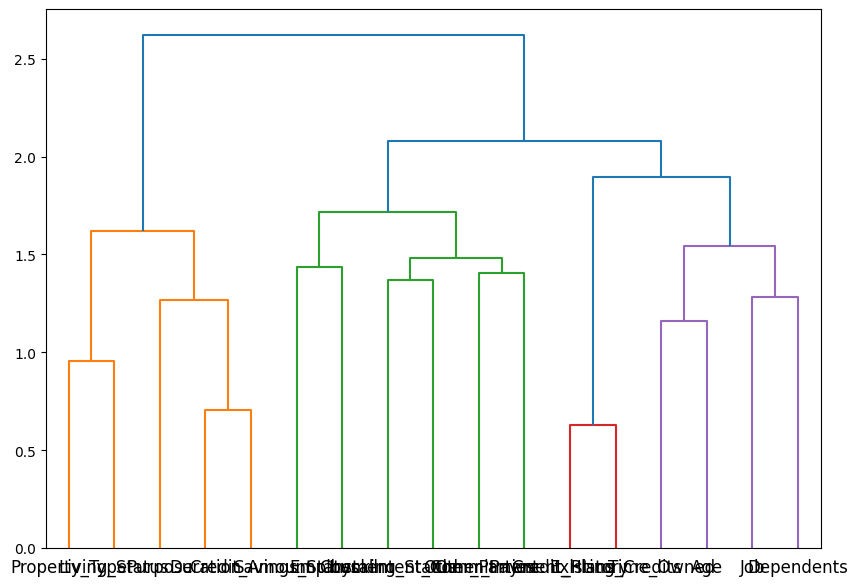

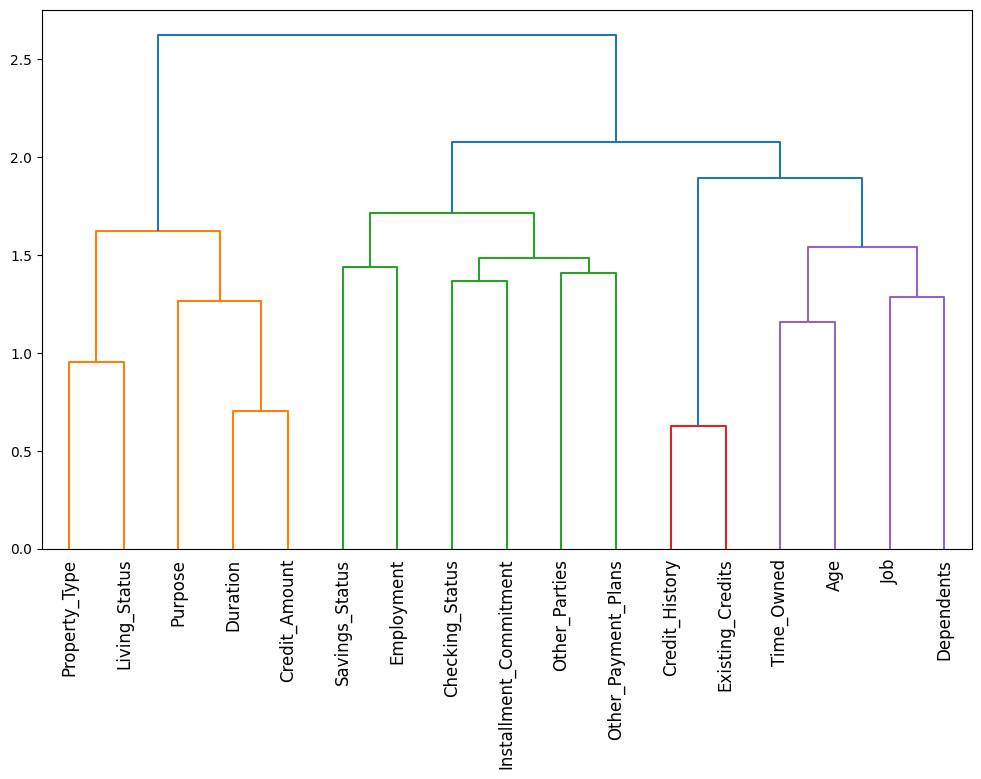

In [37]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import seaborn as sns
import matplotlib.pyplot as plt

# Perform hierarchical clustering
#linkage_matrix = linkage(correlation_matrix, method='ward')

correlation_matrix = correlation_matrix.replace([np.inf, -np.inf], np.nan)  # Replace inf with NaN
correlation_matrix = correlation_matrix.fillna(correlation_matrix.max().max())  # Replace NaN with maximum value in matrix
#Now proceed with the hierarchical clustering
linkage_matrix = linkage(correlation_matrix, method='ward')

# Visualize the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, labels=correlation_matrix.columns)
plt.show()

# Decide the number of clusters and assign features to clusters
num_clusters =2   # Change this based on the dendrogram
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')
feature_clusters= {cluster: [] for cluster in range(1, num_clusters + 1)}
for idx, cluster in enumerate(clusters):
    feature_clusters[cluster].append(correlation_matrix.columns[idx])

plt.figure(figsize=(12, 7))  # Increase the figure size
dendrogram(linkage_matrix, labels=correlation_matrix.columns, leaf_rotation=90)  # Rotate the labels
plt.show()


Cluster 1: Features ['Duration', 'Purpose', 'Credit_Amount', 'Property_Type', 'Living_Status']
Classification Report for Cluster 1:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        71
           1       0.56      0.52      0.54        29

    accuracy                           0.74       100
   macro avg       0.68      0.67      0.68       100
weighted avg       0.73      0.74      0.74       100

ROC AUC for Cluster 1: 0.67

Cluster 2: Features ['Checking_Status', 'Credit_History', 'Savings_Status', 'Employment', 'Installment_Commitment', 'Other_Parties', 'Time_Owned', 'Age', 'Other_Payment_Plans', 'Existing_Credits', 'Job', 'Dependents']
Classification Report for Cluster 2:
              precision    recall  f1-score   support

           0       0.77      0.87      0.82        71
           1       0.53      0.34      0.42        29

    accuracy                           0.72       100
   macro avg       0.65      0.61     

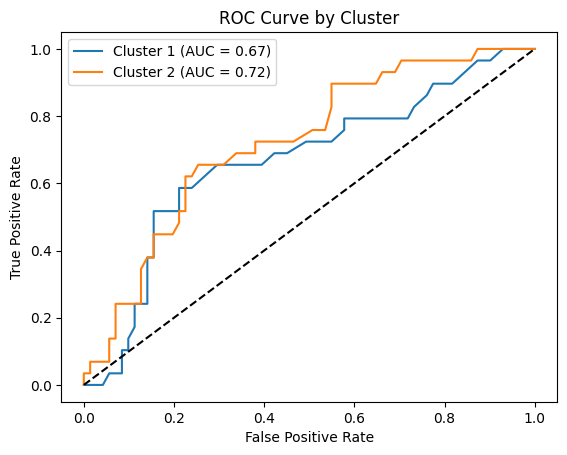

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Split data into train-test
X = credit.drop('Credit_Risk', axis=1)
y = credit['Credit_Risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Create cluster-specific datasets
cluster_data = {}
for cluster_id, features in feature_clusters.items():
    valid_features = [f for f in features if f in X_train.columns]
    cluster_data[cluster_id] = {
        'X_train': X_train[valid_features],
        'X_test': X_test[valid_features],
        'y_train': y_train,
        'y_test': y_test
    }

# Train model directly on the clusters
for cluster_id, data in cluster_data.items():
    print(f"\nCluster {cluster_id}: Features {data['X_train'].columns.tolist()}")

    # Train model
    model = RandomForestClassifier(random_state=42)
    model.fit(data['X_train'], data['y_train'])

    # Predict and evaluate
    y_pred = model.predict(data['X_test'])
    y_pred_prob = model.predict_proba(data['X_test'])[:, 1]
    print(f"Classification Report for Cluster {cluster_id}:")
    print(classification_report(data['y_test'], y_pred))
    auc = roc_auc_score(data['y_test'], y_pred_prob)
    print(f"ROC AUC for Cluster {cluster_id}: {auc:.2f}")

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(data['y_test'], y_pred_prob)
    plt.plot(fpr, tpr, label=f'Cluster {cluster_id} (AUC = {auc:.2f})')

# Finalize the plot
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve by Cluster')
plt.legend()
plt.show()


In [ ]:
from sklearn.inspection import permutation_importance


# Feature Importance Using Permutation
feature_impact_by_cluster = {}
for cluster_id, data in cluster_data.items():
    cluster_model = RandomForestClassifier(random_state=42)
    cluster_model.fit(data['X_train'], data['y_train'])
    importance = permutation_importance(
        cluster_model, data['X_test'], data['y_test'], scoring='f1', n_repeats=5, random_state=42
    )
    feature_impact = {
        feature: importance.importances_mean[i]
        for i, feature in enumerate(data['X_test'].columns)
    }
    feature_impact_sorted = sorted(feature_impact.items(), key=lambda x: x[1], reverse=True)
    feature_impact_by_cluster[cluster_id] = feature_impact_sorted

    print(f"\nCluster {cluster_id} Feature Impact:")
    for feature, impact in feature_impact_sorted:
        print(f"  Feature: {feature}, Impact: {impact:.4f}")



Cluster 1 Feature Impact:
  Feature: Duration, Impact: 0.2181
  Feature: Purpose, Impact: 0.1185
  Feature: Living_Status, Impact: 0.0890
  Feature: Property_Type, Impact: 0.0887
  Feature: Credit_Amount, Impact: 0.0870

Cluster 2 Feature Impact:
  Feature: Employment, Impact: 0.0867
  Feature: Time_Owned, Impact: 0.0679
  Feature: Installment_Commitment, Impact: 0.0623
  Feature: Other_Payment_Plans, Impact: 0.0534
  Feature: Age, Impact: 0.0481
  Feature: Credit_History, Impact: 0.0348
  Feature: Existing_Credits, Impact: 0.0269
  Feature: Savings_Status, Impact: 0.0184
  Feature: Checking_Status, Impact: 0.0153
  Feature: Dependents, Impact: 0.0004
  Feature: Job, Impact: -0.0000
  Feature: Other_Parties, Impact: -0.0307


<ipython-input-23-6ea438b6d40c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scores, y=features, orient='h', palette='viridis')


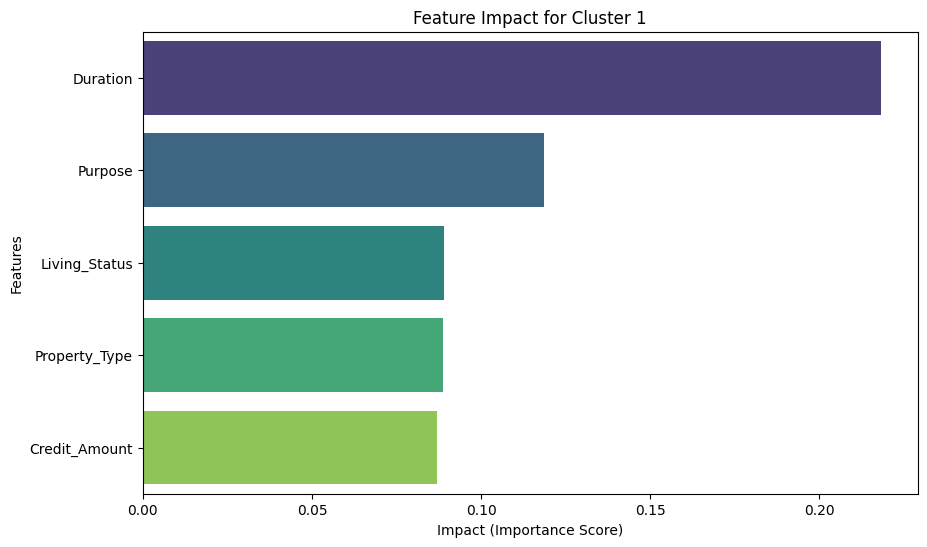

In [ ]:
import seaborn as sns

# Example: Plot for Cluster 1
cluster_id = 1
impacts = feature_impact_by_cluster[cluster_id]
features = [item[0] for item in impacts]
scores = [item[1] for item in impacts]

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=scores, y=features, orient='h', palette='viridis')
plt.title(f"Feature Impact for Cluster {cluster_id}")
plt.xlabel("Impact (Importance Score)")
plt.ylabel("Features")
plt.show()


<ipython-input-24-82b88dad0b0f>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scores, y=features, orient='h', palette='viridis')


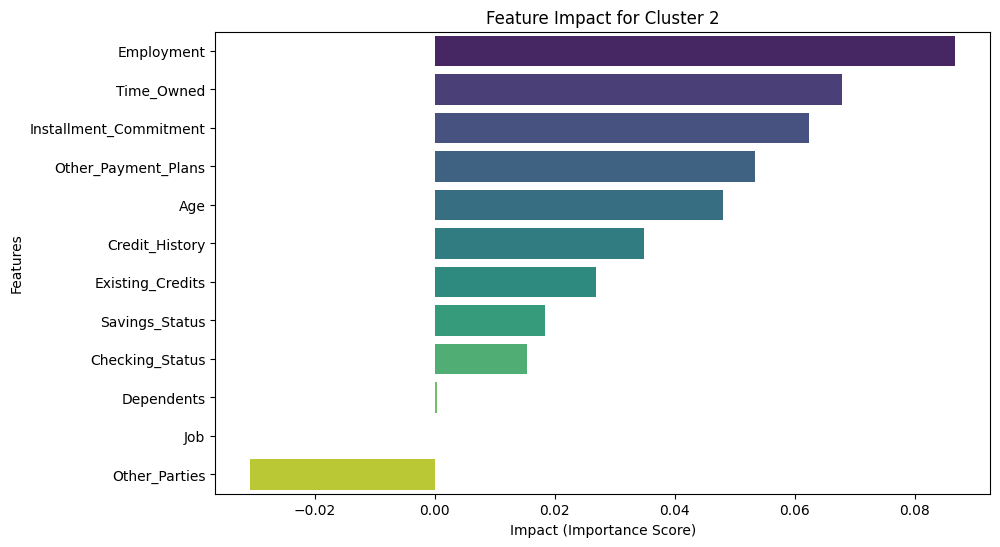

In [ ]:
import seaborn as sns

# Example: Plot for Cluster 2
cluster_id = 2
impacts = feature_impact_by_cluster[cluster_id]
features = [item[0] for item in impacts]
scores = [item[1] for item in impacts]

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=scores, y=features, orient='h', palette='viridis')
plt.title(f"Feature Impact for Cluster {cluster_id}")
plt.xlabel("Impact (Importance Score)")
plt.ylabel("Features")
plt.show()


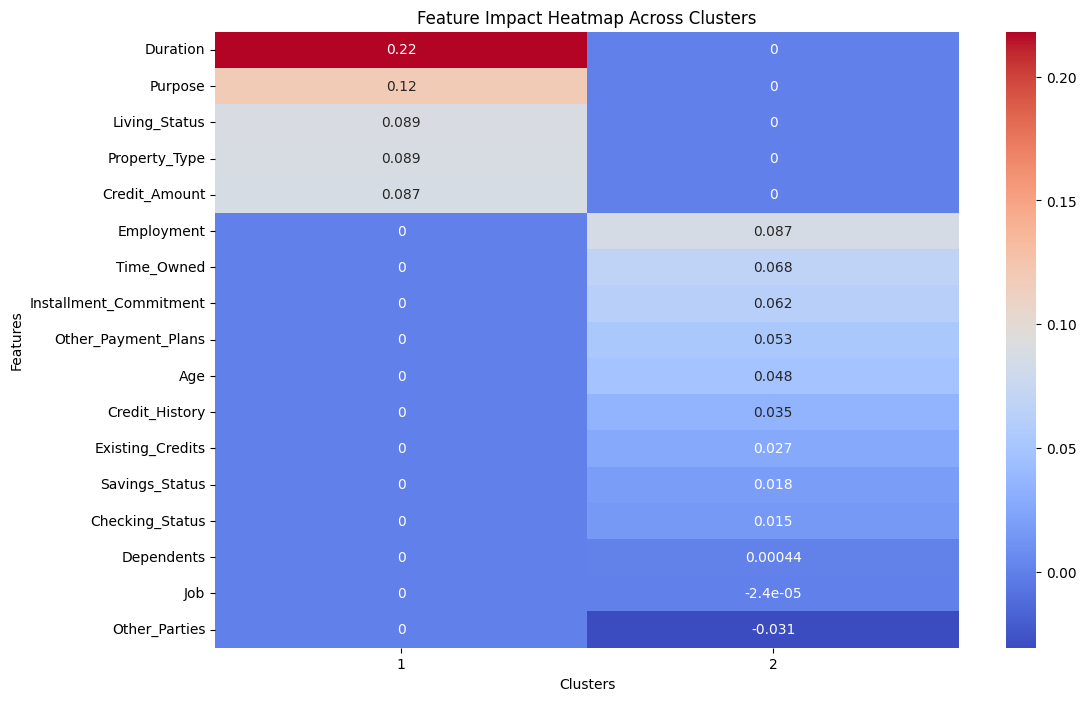

In [ ]:
import pandas as pd
import seaborn as sns

# Convert feature impacts into a DataFrame
heatmap_data = pd.DataFrame.from_dict(
    {cluster_id: {feature: impact for feature, impact in impacts} for cluster_id, impacts in feature_impact_by_cluster.items()},
    orient='index'
).fillna(0)  # Fill missing values with 0

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data.T, annot=True, cmap="coolwarm", cbar=True)
plt.title("Feature Impact Heatmap Across Clusters")
plt.xlabel("Clusters")
plt.ylabel("Features")
plt.show()


In [ ]:
# Combine Predictions and Evaluate
final_predictions = []
for cluster_id, data in cluster_data.items():
    model = RandomForestClassifier(random_state=42)
    model.fit(data['X_train'], data['y_train'])
    preds = model.predict(data['X_test'])
    final_predictions.append(preds)


In [ ]:
# Aggregate predictions (majority vote)
final_predictions_combined = np.round(np.mean(final_predictions, axis=0))
print("\nCombined Classification Report:")
print(classification_report(y_test, final_predictions_combined))



Combined Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.96      0.83        71
           1       0.62      0.17      0.27        29

    accuracy                           0.73       100
   macro avg       0.68      0.57      0.55       100
weighted avg       0.71      0.73      0.67       100



# **Comparison between results from combined cluster predictions and a model without using clustering**

In [ ]:
# Define features and target
new_X = credit.drop(['Credit_Risk'], axis=1)  # Features
new_y = credit['Credit_Risk']                            # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.1, random_state=42)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred =rf.predict(X_test)
acc=accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

Accuracy: 0.76


In [ ]:
# Compute ROC AUC for cluster-based and non-clustered predictions
cluster_auc = roc_auc_score(y_test, final_predictions_combined)
non_cluster_auc = roc_auc_score(y_test, y_pred_prob)
# Non-clustered predictions
fpr_non_cluster, tpr_non_cluster, _ = roc_curve(y_test, y_pred_prob)

In [ ]:
# Combine cluster-based predictions (using majority vote as an example)
# Convert `final_predictions` (list of arrays) to a 2D NumPy array
final_predictions_array = np.array(final_predictions)  # Shape: (num_clusters, num_samples)

# Majority voting for the combined prediction
combined_cluster_preds = np.round(final_predictions_array.mean(axis=0)).astype(int)  # Shape: (num_samples,)

# Plot ROC curves
# Cluster-based predictions
fpr_cluster, tpr_cluster, _ = roc_curve(y_test, combined_cluster_preds)

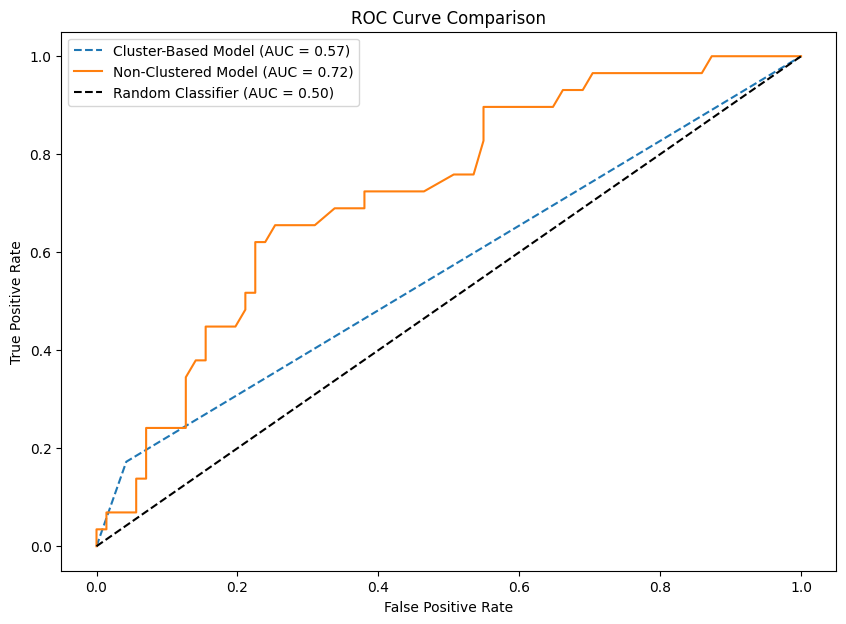

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(fpr_cluster, tpr_cluster, label=f'Cluster-Based Model (AUC = {cluster_auc:.2f})', linestyle='--')
plt.plot(fpr_non_cluster, tpr_non_cluster, label=f'Non-Clustered Model (AUC = {non_cluster_auc:.2f})', linestyle='-')

# Random classifier line
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')

# Finalize plot
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics for the combined clustered model
final_combined_preds = np.concatenate(final_predictions)  # Combine predictions from all clusters
final_y_test = np.concatenate([data['y_test'] for data in cluster_data.values()])  # Combine the true labels

# Metrics for combined cluster-based model
clustered_accuracy = accuracy_score(final_y_test, final_combined_preds)
clustered_precision = precision_score(final_y_test, final_combined_preds, average='binary')
clustered_recall = recall_score(final_y_test, final_combined_preds, average='binary')
clustered_f1 = f1_score(final_y_test, final_combined_preds, average='binary')

print("Metrics for Combined Cluster-Based Model:")
print(f"Accuracy: {clustered_accuracy:.2f}")
print(f"Precision: {clustered_precision:.2f}")
print(f"Recall: {clustered_recall:.2f}")
print(f"F1 Score: {clustered_f1:.2f}")

# Metrics for the unclustered model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

unclustered_accuracy = accuracy_score(y_test, y_pred)
unclustered_precision = precision_score(y_test, y_pred, average='binary')
unclustered_recall = recall_score(y_test, y_pred, average='binary')
unclustered_f1 = f1_score(y_test, y_pred, average='binary')

print("\nMetrics for Unclustered Model:")
print(f"Accuracy: {unclustered_accuracy:.2f}")
print(f"Precision: {unclustered_precision:.2f}")
print(f"Recall: {unclustered_recall:.2f}")
print(f"F1 Score: {unclustered_f1:.2f}")


Metrics for Combined Cluster-Based Model:
Accuracy: 0.73
Precision: 0.54
Recall: 0.43
F1 Score: 0.48

Metrics for Unclustered Model:
Accuracy: 0.76
Precision: 0.67
Recall: 0.34
F1 Score: 0.45
